In [1]:
from gb.large import F_air
from gb.constants import Gval, kB, amu, T_air, FM_air, Rsp_air, atm

from IPython.display import Math

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

To use the equations we need the gas constant Rsp. Other things like temperature are fairly trivial

In [2]:
print(f'Book value of Rsp for air: {Rsp_air}')
Rsp = kB / (FM_air * amu)
print(f'Calculated value of Rsp for air: {Rsp}')

Book value of Rsp for air: 287.058
Calculated value of Rsp for air: 287.00249052941723


### Air Pressure Considering Self-Gravitation
In code, we have a function that gives derivatives, and this defines the system. This is from the post:

https://gravitationalballoon.blogspot.com/2013/10/inclusion-of-air-pressure-effects-for.html

I will echo the equations here.

In [3]:
Math(
    r"P'(r) = - \frac{P(r) g(r)}{R_{sp} T }  \\"
    r"g'(r) = \frac{ 4 G \pi }{ R_{sp} T } P(r) - \frac{ 2 g(r) }{ r }"
)

<IPython.core.display.Math object>

In [5]:
# example use of the method:
F_air(0.0, [0.0, atm, 0.0])

[0.0, -0.0, 1.010334055248568e-09]

In [6]:
N = 200
R_max = 1.0e8
R_values = [i*R_max/N for i in range(N)]

In [8]:
sol = solve_ivp(F_air, [0., R_max], [0.0, atm, 0.], dense_output=True)
print(sol)
print(dir(sol))
outer_P = sol.y[0][-1] / atm
print(f'Air pressure at final radius of {R_max} is {outer_P}')

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fe27651fa90>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.66587779e-04, 2.93246557e-03, 2.95912435e-02,
       2.96179022e-01, 2.96205681e+00, 2.96208347e+01, 2.96208614e+02,
       2.96208640e+03, 2.83553220e+04, 2.45105220e+05, 1.81210542e+06,
       5.96647747e+06, 1.54279265e+07, 2.48482814e+07, 3.51552335e+07,
       5.01155972e+07, 6.71192957e+07, 8.70974841e+07, 1.00000000e+08])
 t_events: None
        y: array([[0.00000000e+00, 8.20774578e-06, 1.09245096e-02, 1.12251676e+01,
        1.12555332e+04, 1.12585728e+07, 1.12588768e+10, 1.12589072e+13,
        1.12589101e+16, 9.87657851e+18, 6.37866113e+21, 2.56769409e+24,
        8.82335668e+25, 1.23362222e+27, 3.76694385e+27, 7.32668599e+27,
        1.26099870e+28, 1.80411366e+28, 2.36288777e+28, 2.68928417e+28],
       [1.01325

In [9]:
y_values = sol.sol(R_values)

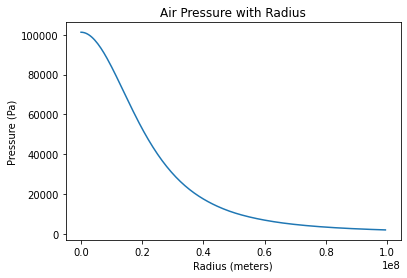

In [11]:
plt.plot(R_values, y_values[1])
plt.xlabel('Radius (meters)')
plt.ylabel('Pressure (Pa)')
plt.title('Air Pressure with Radius')
plt.show()

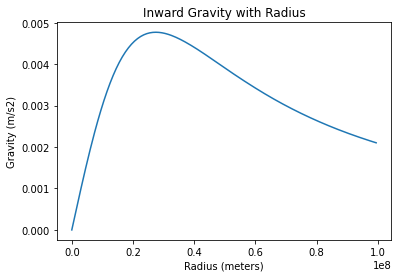

In [12]:
plt.plot(R_values, y_values[2])
plt.xlabel('Radius (meters)')
plt.ylabel('Gravity (m/s2)')
plt.title('Inward Gravity with Radius')
plt.show()

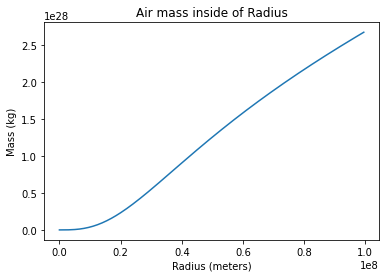

In [13]:
plt.plot(R_values, y_values[0])
plt.xlabel('Radius (meters)')
plt.ylabel('Mass (kg)')
plt.title('Air mass inside of Radius')
plt.show()

### Large Balloon Stability
Revisiting constructs from the post:

https://gravitationalballoon.blogspot.com/2013/12/the-specific-stability-requirement-of.html

It would be very interesting to have a ratio of the derivative to the absolute value for both P and g.

In [15]:
M_values, P_values, g_values = y_values

In [16]:
R_values2 = [0.5*(R_values[i] + R_values[i + 1]) for i in range(N-1)]

In [17]:
delta_r = R_max/N
dPdr = [(P_values[i + 1] - P_values[i]) / (delta_r * P_values[i + 1]) for i in range(N-1)]
dgdr = [(g_values[i + 1] - g_values[i]) / (delta_r * g_values[i + 1]) for i in range(N-1)]

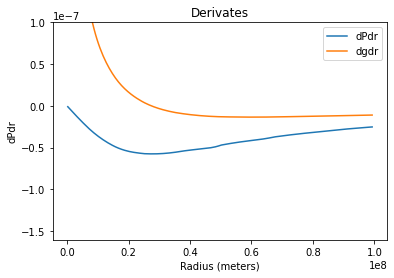

In [18]:
plt.plot(R_values2, [[dPdr[i], dgdr[i]] for i in range(N-1)])
plt.xlabel('Radius (meters)')
plt.ylabel('dPdr')
plt.title('Derivates')
plt.legend(['dPdr', 'dgdr'])
plt.ylim(top=0.1e-6)
plt.show()